# Regression Lines
Regression lines to predict trend of data.

In [4]:
# Enable Intellisense
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
from matplotlib import pyplot, dates
import plotly.express as px 
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.io as pio
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Annoying warning
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
cumulative_confirmed = pd.read_csv("data/daily_cumulative_confirmed.csv")
cumulative_confirmed['date'] = pd.to_datetime(cumulative_confirmed['date'], format='%Y-%m-%d')
cumulative_confirmed.tail()

,date,daily_cases,cumulative_cases
16,2020-03-23,128,402
17,2020-03-24,152,554
18,2020-03-25,155,709
19,2020-03-26,218,927
20,2020-03-27,243,1170


**Date since start**

In [6]:
start_date = cumulative_confirmed['date'][0]
start_date

Timestamp('2020-03-05 00:00:00')

In [7]:
cumulative_confirmed['days_since_start'] = cumulative_confirmed['date'].apply(lambda x: (x-start_date).days)
cumulative_confirmed

,date,daily_cases,cumulative_cases,days_since_start
0,2020-03-05,1,1,0
1,2020-03-07,1,2,2
2,2020-03-08,1,3,3
3,2020-03-09,4,7,4
4,2020-03-11,6,13,6
5,2020-03-12,3,16,7
6,2020-03-13,8,24,8
7,2020-03-14,14,38,9
8,2020-03-15,13,51,10
9,2020-03-16,11,62,11


## Scipy fit curve

In [8]:
from scipy.optimize import curve_fit

In [9]:
def func(x, a, b, c):
    return a * b ** x + c

In [10]:
xdata = cumulative_confirmed['days_since_start']
ydata = cumulative_confirmed['cumulative_cases']

In [11]:
popt, pcov = curve_fit(func, xdata, ydata)

In [12]:
popt

array([ 3.7591152 ,  1.29902132, -3.88332216])

In [13]:
last_actual_day = xdata.iloc[-1]
no_predict_days = 7
next_week_list = list(range(last_actual_day +1,last_actual_day+no_predict_days+1))
# next_week_list

In [14]:
xdata_pred = xdata.append(pd.Series(next_week_list), ignore_index=True)
y_data_pred = func(xdata_pred, *popt)
# xdata_pred

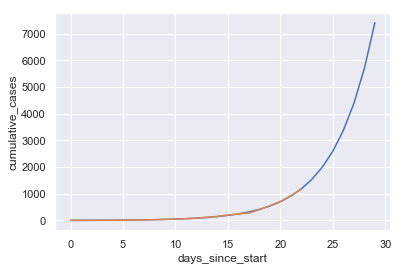

In [15]:
sns.lineplot(xdata_pred, y_data_pred)
sns.lineplot(xdata, ydata)

In [16]:
y_data_pred = y_data_pred.apply(lambda x: round(x))

In [17]:
predict_cum_confirmed = pd.DataFrame(data={'days_since_start':xdata_pred, 'cumulative_cases':y_data_pred})
predict_cum_confirmed

,days_since_start,cumulative_cases
0,0,0
1,2,2
2,3,4
3,4,7
4,6,14
5,7,20
6,8,27
7,9,36
8,10,48
9,11,63


In [18]:
predict_cum_confirmed['date'] = predict_cum_confirmed['days_since_start'].apply(lambda x: start_date + timedelta(days=x))
predict_cum_confirmed

,days_since_start,cumulative_cases,date
0,0,0,2020-03-05
1,2,2,2020-03-07
2,3,4,2020-03-08
3,4,7,2020-03-09
4,6,14,2020-03-11
5,7,20,2020-03-12
6,8,27,2020-03-13
7,9,36,2020-03-14
8,10,48,2020-03-15
9,11,63,2020-03-16


In [19]:
predict_cum_confirmed.set_index('date', inplace=True)
predict_cum_confirmed

,days_since_start,cumulative_cases
date,,
2020-03-05,0,0
2020-03-07,2,2
2020-03-08,3,4
2020-03-09,4,7
2020-03-11,6,14
2020-03-12,7,20
2020-03-13,8,27
2020-03-14,9,36
2020-03-15,10,48


### Daily

In [20]:
predict_cum_daily_confirmed = predict_cum_confirmed.copy()

In [21]:
predict_cum_daily_confirmed['daily_cases'] = predict_cum_daily_confirmed['cumulative_cases'].diff()
predict_cum_daily_confirmed['daily_cases'][0] = predict_cum_daily_confirmed['cumulative_cases'][0]
predict_cum_daily_confirmed

,days_since_start,cumulative_cases,daily_cases
date,,,
2020-03-05,0,0,0.0
2020-03-07,2,2,2.0
2020-03-08,3,4,2.0
2020-03-09,4,7,3.0
2020-03-11,6,14,7.0
2020-03-12,7,20,6.0
2020-03-13,8,27,7.0
2020-03-14,9,36,9.0
2020-03-15,10,48,12.0


In [22]:
predict_cum_daily_confirmed['daily_cases'][18:].pct_change().mean() * 100

29.89962966761845

In [23]:
predict_cum_daily_confirmed['cumulative_cases'][18:].pct_change().mean() * 100

29.9705064036618

In [25]:
predict_cum_daily_confirmed.drop('days_since_start', axis = 1).to_csv('data/predict_confirmed.csv')